<a href="https://colab.research.google.com/github/lightfury36/Internship-tasks/blob/main/K_means_clustering_IRIS_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction using Unsupervised ML**#
> From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

**K-means Clustering**
* Step 1: Choose the number of clusters k
* Step 2: Select k random points from the data as centroids
* Step 3: Assign all the points to the closest cluster centroid
* Step 4: Recompute the centroids of newly formed clusters
* Step 5: Repeat steps 3 and 4.

**Dataset:** - https://bit.ly/3kXTdox






In [5]:
#import the libraries
from sklearn.cluster import KMeans

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
#Import the dataset

from google.colab import files
uploaded = files.upload()



Saving Iris.csv to Iris.csv


In [8]:
df = pd.read_csv("/content/Iris.csv")

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Now we select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable called x so that we can train our model with these features. For this, we use the iloc function on df, and the column index (0,1,2,3) for the above four columns are used, as shown below:

In [10]:
#split the dataset in to independent and target varaibale

X = df.iloc[:, 1:5].values #independent features
#print(X)

Y = df.iloc[:,-1].values #targer feature
#print(Y)

#**Implement K-means with K=5(randomly)**#



 Let’s arbitrarily assign the value of k as 5. We will implement k-means clustering using k=5.

In [12]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(X)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 2 4 4 4 2 4 2 2 4 2 4 2 4 4 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 1 4 3 1 1 3 2 3 1 3 1
 1 1 4 1 1 1 3 3 4 1 4 3 4 1 3 4 4 1 3 3 3 1 4 4 3 1 1 4 1 1 1 4 1 1 1 4 1
 1 4]


array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [6.52916667, 3.05833333, 5.50833333, 2.1625    ],
       [5.508     , 2.6       , 3.908     , 1.204     ],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.20769231, 2.85384615, 4.74615385, 1.56410256]])

There’s a method called the Elbow method, which is used to find the optimal number of clusters (k) in a dataset. So let’s use this method to calculate the optimum value of k. 

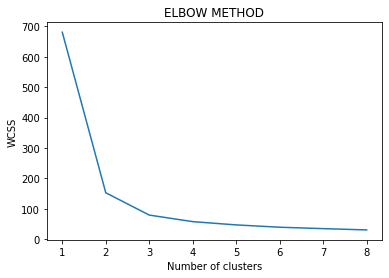

In [ ]:
#code for Elbow method to find optimal K value
elbow=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
plt.plot(range(1, 9), elbow)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.title('ELBOW METHOD')
plt.show()


The output graph of the Elbow method is shown above. Note that the shape of 
elbow is approximately formed at k=3. Let’s implement k-means again using k=3

#**Implemening the k-means with optimal value k=3**#


In [ ]:
KMeans3 = KMeans(n_clusters=3, random_state = 0)
y_KMeans3 = KMeans3.fit_predict(X)
print(y_KMeans3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
#find the centroids for k=3

KMeans3.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

#**Visualizing the clustering**#

Finally, its time to visualize the three clusters that were formed with the optimal k value. You can clearly see three clusters in the image below, with each cluster represented by a different color.

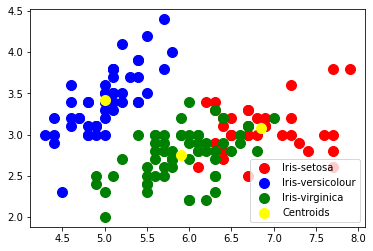

In [ ]:
plt.scatter(X[y_KMeans3 == 0, 0], X[y_KMeans3 == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_KMeans3 == 1, 0], X[y_KMeans3 == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_KMeans3 == 2, 0], X[y_KMeans3== 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
y_KMeans3 = KMeans3.fit_predict(X)
plt.scatter(KMeans3.cluster_centers_[:, 0], KMeans3.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()